In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import useful 
import ipywidgets as widgets 

In [2]:
metadata = pd.read_csv('BA_Application_SimplAI.xlsx - Transaccional.csv')

# Fase 1 del proceso de selección SimplAI: Ignacio Córdova Pou 


### Estructura del Notebook: 
 - Visualizaciones generales de balance y saldo en cuenta 
 - Visualizaciones con información de los diccionarios 
 - Insights y conclusiones en el report PDF adjunto

### Por favor, seleccione el ID de Cliente y ejecute el código: 

In [3]:
ID = widgets.Dropdown(
    options=['305436', '305434', '305443'],
    value='305443',
    description='Client ID :',
    disabled=False)

In [4]:
ID

Dropdown(description='Client ID :', index=2, options=('305436', '305434', '305443'), value='305443')

In [5]:
#returns a df with transactions of client "ID.value"
df = useful.client_df(metadata,int(ID.value))
#takes care of the DATE format and sorts 
df = useful.arange_df(df)

/Users/codefrom0/Documents/SimplAI/useful.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y')
/Users/codefrom0/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Lo primero es poder obtener información clara sobre el balance de los últimos meses. La siguiente función nos devuelve un gráfico con el balance mensual del cliente seleccionado: 

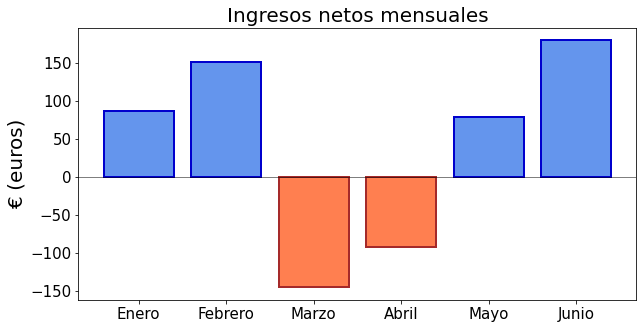

In [6]:
useful.monthly_balance(df)

### También veo imprescindible que cada cliente conozca la evolución del saldo en cuenta

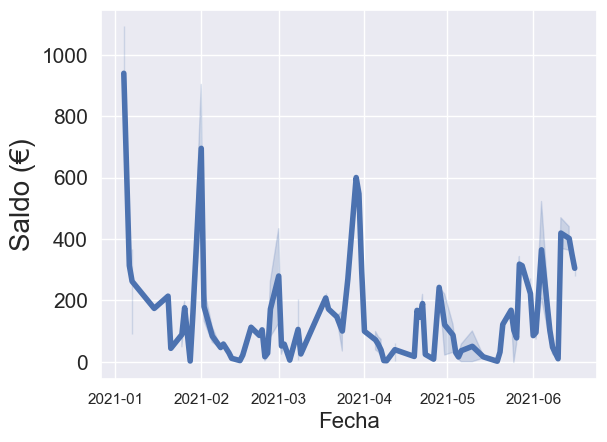

In [7]:
useful.simple_evolution(df)

# Sincronización de datos del cliente con datos de los diccionarios

### Me interesaría mucho saber qué porcentaje de mis gastos he marcado como "prescindibles" para poder ahorrar más. Para ello he construido una función que sincroniza los datos del cliente con los datos del diccionario. 

In [8]:
dic1 = pd.read_csv('BA_Application_SimplAI.xlsx - Dicc_Debito.csv')

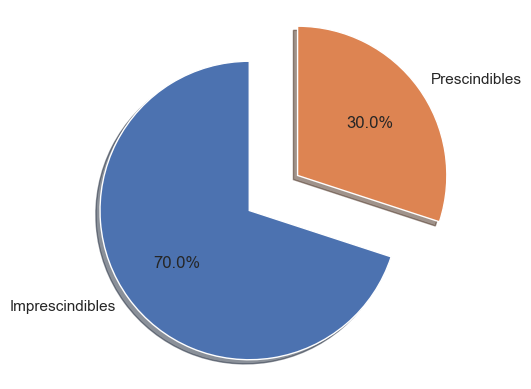

In [9]:
useful.prescindibles_vs_imprescindibles(df,dic1)

## Distribución de gastos de cada mes

In [10]:
month = widgets.Dropdown(
    options=['1', '2', '3','4','5','6'],
    value='6',
    description='Month :',
    disabled=False)

In [11]:
month

Dropdown(description='Month :', index=5, options=('1', '2', '3', '4', '5', '6'), value='6')

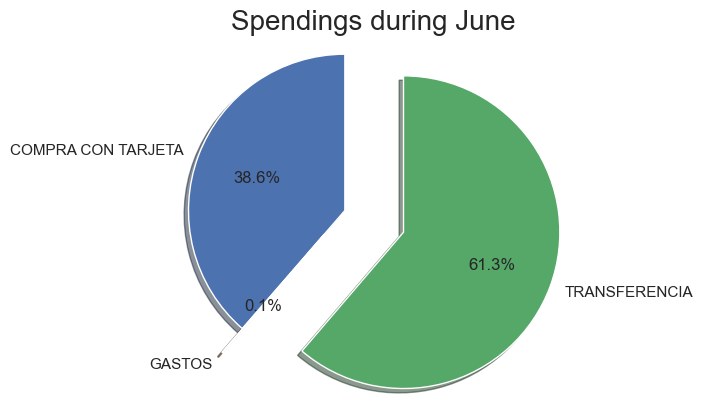

In [12]:
useful.nombre_gastos(df,dic1,month)

In [13]:
useful.evolution_of_months(df)

/Users/codefrom0/Documents/SimplAI/useful.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.FECHA.dt.month #new column with just the month info
